# Analysis on Cleaned Data


How can it generalize to dataset with different
- Network relations
- Sensor types
- Structures
- Resolution


Anomaly
- We have the manual removal, how about not removing them?


Power for the pumping stations and the weather radars has not been checked for erroneous data. G73F010 and G72F040 are level sensors.

In [ ]:
import pandas as pd
from tqdm import tdqm

from fault_management_uds.config import PROJ_ROOT
from fault_management_uds.config import DATA_DIR, RAW_DATA_DIR, INTERIM_DATA_DIR, PROCESSED_DATA_DIR, EXTERNAL_DATA_DIR
from fault_management_uds.config import MODELS_DIR, REPORTS_DIR, FIGURES_DIR

## Raw Data Analysis

Investigating the extent of the provided scripts and analysis on the raw data

In [11]:
from fault_management_uds.data.load_data import import_danova, import_ifix, import_system2000

In [12]:
raw_data_path = RAW_DATA_DIR / 'Bellinge' / 'sensor-data' / '2-raw-data'
scripts_path = RAW_DATA_DIR / 'Bellinge' / 'scripts'


In [25]:
# Loading metadata
def import_metadata(scripts_path):
    """Load metadata, ie. the on sensors and manual removals."""

    metadata = pd.read_csv(scripts_path / '#9_Scripts' / 'etc' / 'obs_input.csv', sep=";")
    manual_remove = pd.read_csv(scripts_path / '#9_Scripts' / 'etc' / 'manual_remove.csv', sep=";")

    return metadata, manual_remove


metadata, manual_remove = import_metadata(scripts_path)
metadata.shape

(36, 20)

In [15]:
metadata.head(3)

,IdMeasurement,Area,Source,Version,Type,Folderpath,Filename,TagSRO,Navn,StartTime,EndTime,Conversion,comment,unit,obvious_min,obvious_max,zeropoint,window_frozen,outlier_threshold,outlier_width
0,G71F04R_Level1,Bellinge,iFix,p4,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV.rpt,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV,Niv. Indløb 1,19-11-2020,19-08-2021,1.000000,NaN,m,0.001,1.5,17.09,20,0.2,1
1,G71F04R_Level2,Bellinge,iFix,p4,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL4!M5-PV-SMO.F_CV.rpt,SVTP03.G71F04R-D1-W1-BL4!M5-PV-SMO.F_CV,Niv. Indløb 2,19-11-2020,19-08-2021,1.000000,NaN,m,0.001,1.5,17.05,20,0.2,1
2,G71F04R_Level1,Bellinge,iFix,p3,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV_red.rpt,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV,Niv. Indløb 1,12-10-2020,19-11-2020,0.689655,scaling factor wrong initially,cm,0.001,1.5,17.09,20,0.2,1


In [29]:
metadata['IdMeasurement'].nunique()

19

In [31]:
metadata[metadata['IdMeasurement'] == 'G71F04R_Level1']

,IdMeasurement,Area,Source,Version,Type,Folderpath,Filename,TagSRO,Navn,StartTime,EndTime,Conversion,comment,unit,obvious_min,obvious_max,zeropoint,window_frozen,outlier_threshold,outlier_width
0,G71F04R_Level1,Bellinge,iFix,p4,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV.rpt,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV,Niv. Indløb 1,19-11-2020,19-08-2021,1.000000,NaN,m,0.001,1.5,17.09,20,0.2,1
2,G71F04R_Level1,Bellinge,iFix,p3,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV_red.rpt,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV,Niv. Indløb 1,12-10-2020,19-11-2020,0.689655,scaling factor wrong initially,cm,0.001,1.5,17.09,20,0.2,1
4,G71F04R_Level1,Bellinge,System2000,p2,Level,./2_raw_data/,data-pG71F04R-D1-W1-BL3_M2-PV-SMO_red.txt,G71F04R-D1-W1-BL3_M2-PV-SMO,Niv. Indløb 1,06-01-2020,12-10-2020,68.965517,cm -> m + scaling factor wrong initially (2.9/2),cm,0.001,1.5,17.09,20,0.2,1
31,G71F04R_Level1,Bellinge,System2000,p1,Level,./2_raw_data/,data-pG71F04R-D1-W1-BL3_M2-PV-SMO.txt,G71F04R-D1-W1-BL3_M2-PV-SMO,Niv. Indløb 1,01-08-2010,06-01-2020,100.000000,cm -> m,cm,0.001,1.5,17.09,20,0.2,1


In [30]:
metadata[metadata['IdMeasurement'].duplicated()]

,IdMeasurement,Area,Source,Version,Type,Folderpath,Filename,TagSRO,Navn,StartTime,EndTime,Conversion,comment,unit,obvious_min,obvious_max,zeropoint,window_frozen,outlier_threshold,outlier_width
2,G71F04R_Level1,Bellinge,iFix,p3,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV_red.rpt,SVTP03.G71F04R-D1-W1-BL3!M5-PV-SMO.F_CV,Niv. Indløb 1,12-10-2020,19-11-2020,0.689655,scaling factor wrong initially,cm,0.001,1.5,17.09,20,0.2,1
3,G71F04R_Level2,Bellinge,iFix,p3,Level,./2_raw_data/,SVTP03.G71F04R-D1-W1-BL4!M5-PV-SMO.F_CV_red.rpt,SVTP03.G71F04R-D1-W1-BL4!M5-PV-SMO.F_CV,Niv. Indløb 2,12-10-2020,19-11-2020,0.689655,scaling factor wrong initially,cm,0.001,1.5,17.05,20,0.2,1
4,G71F04R_Level1,Bellinge,System2000,p2,Level,./2_raw_data/,data-pG71F04R-D1-W1-BL3_M2-PV-SMO_red.txt,G71F04R-D1-W1-BL3_M2-PV-SMO,Niv. Indløb 1,06-01-2020,12-10-2020,68.965517,cm -> m + scaling factor wrong initially (2.9/2),cm,0.001,1.5,17.09,20,0.2,1
5,G71F04R_Level2,Bellinge,System2000,p2,Level,./2_raw_data/,data-pG71F04R-D1-W1-BL4_M2-PV-SMO_red.txt,G71F04R-D1-W1-BL4_M2-PV-SMO,Niv. Indløb 2,06-01-2020,12-10-2020,68.965517,cm -> m + scaling factor wrong initially,cm,0.001,1.5,17.09,20,0.2,1
22,G71F05R_LevelBasin,Bellinge,System2000,p1,Level,./2_raw_data/,data-pG71F05R-D1-W1-BL3_M2-PV-SMO.txt,G71F05R-D1-W1-BL3_M2-PV-SMO,Niv. Skyllevandsbeh.,01-08-2010,12-10-2020,100.000000,cm -> m,cm,0.000,5.0,14.14,20,0.2,1
23,G71F05R_LevelInlet,Bellinge,System2000,p1,Level,./2_raw_data/,data-pG71F05R-D1-W1-BL2_M2-PV-SMO.txt,G71F05R-D1-W1-BL2_M2-PV-SMO,Niv. Indløb,01-08-2010,12-10-2020,100.000000,cm -> m,cm,0.001,1.5,18.39,20,0.2,1
24,G71F05R_position,Bellinge,System2000,p1,Position,./2_raw_data/,data-pG71F05R-D1-W2-BG3_M2-PV-SMO.txt,G71F05R-D1-W2-BG3_M2-PV-SMO,Position throttle,01-08-2010,12-10-2020,100.000000,cm -> m,cm,0.000,3.0,13.84,60,0.2,1
25,G71F06R_LevelInlet,Bellinge,System2000,p1,Level,./2_raw_data/,data-pG71F06R-D1-W1-BL2_M2-PV-SMO.txt,G71F06R-D1-W1-BL2_M2-PV-SMO,BV6 Niveaumåler indløb,01-08-2010,12-10-2020,100.000000,cm -> m,cm,0.002,3.0,16.72,20,0.2,1
26,G71F68Y_LevelPS,Bellinge,System2000,p1,Level,./2_raw_data/,data-pG71F68Y-D1-W2-BL1_M2-PV-SMO.txt,G71F68Y-D1-W2-BL1_M2-PV-SMO,Niv. Pumpesump,01-08-2010,12-10-2020,100.000000,cm -> m,cm,0.001,5.5,11.17,20,0.2,1
27,G71F68Yp1,Bellinge,System2000,p1,Discharge,./2_raw_data/,data-pG71F68Y-D1-W2-BF1_M5-PV-SMO.txt,G71F68Y-D1-W2-BF1_M5-PV-SMO,Flowmåler,01-08-2010,12-10-2020,3600.000000,m3/h -> m3/s,m3/h,-5.000,5.0,NaN,20,0.2,1


In [28]:
metadata['IdMeasurement'].tolist()

['G71F04R_Level1',
 'G71F04R_Level2',
 'G71F04R_Level1',
 'G71F04R_Level2',
 'G71F04R_Level1',
 'G71F04R_Level2',
 'G71F05R_LevelBasin',
 'G71F05R_LevelInlet',
 'G71F05R_position',
 'G71F06R_LevelInlet',
 'G71F68Y_LevelPS',
 'G71F68Yp1',
 'G71F68Yp1_power',
 'G71F68Yp2_power',
 'G73F010',
 'G80F11B_Level1',
 'G80F11B_Level2',
 'G80F13P_LevelPS',
 'G80F13Pp1_power',
 'G80F13Pp2_power',
 'G80F66Y_Level1',
 'G80F66Y_Level2',
 'G71F05R_LevelBasin',
 'G71F05R_LevelInlet',
 'G71F05R_position',
 'G71F06R_LevelInlet',
 'G71F68Y_LevelPS',
 'G71F68Yp1',
 'G71F68Yp1_power',
 'G71F68Yp2_power',
 'G72F040',
 'G71F04R_Level1',
 'G71F04R_Level2',
 'G80F13P_LevelPS',
 'G80F13Pp1_power',
 'G80F13Pp2_power']

In [24]:
print(f"Area: {metadata['Area'].unique()}")
print(f"Type: {metadata['Type'].unique()}")


Area: ['Bellinge']
Type: ['Level' 'Position' 'Discharge' 'Power']


In [ ]:
def load_sensor_data(metadata):
    """The goal is to create dictionary with a dataframe for each sensor"""

    # iterate each sensor
    sensor_data = {}
    #for i, sensor_row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    for i, sensor_row in metadata.iterrows():

        # if it does not exist, then add it

        # for all other than sensor data
        if sensor_row['Type'] != 'Power':             
            # LOAD DATA
            name = obs_input.at[i,'IdMeasurement']
            path = obs_input.at[i,'Folderpath'] + obs_input.at[i,'Filename']
            conversion = obs_input.at[i,'Conversion']
            if obs_input.at[i,'Source'] == 'System2000':
                raw_data = import_system2000(path, conversion)#, obs_input.at[i,'StartTime'], obs_input.at[i,'EndTime'] )
                print("System2000 data is loaded:", obs_input.at[i,'IdMeasurement']) 
            elif obs_input.at[i,'Source'] == 'iFix':  
                raw_data = import_ifix(path, conversion)#, obs_input.at[i,'StartTime'], obs_input.at[i,'EndTime'] )
                print("iFix data is loaded:", obs_input.at[i,'IdMeasurement'])
                
            elif obs_input.at[i,'Source'] == 'Danova':  
                raw_data = import_danova(path, conversion)#, obs_input.at[i,'StartTime'], obs_input.at[i,'EndTime'] )
                print("Danova data is loaded:", obs_input.at[i,'IdMeasurement'])       
            else: 
                print("There is no data")

            raw_data.value = raw_data.value.round(3)
        else: 
            # TODO: handle power sensor!
            pass

        # stack to the series and sort by datetime

In [ ]:
def load_bellinge_data(scripts_path,):

    ### Loading metadata
    metadata, manual_remove = import_metadata(scripts_path)

    ### Loading sensor data
    




What is the power sensor?

In [ ]:
# loading sensor data only

#### Loading the raw data

#### Recreate: "Time periods with in-sewer sensor data"

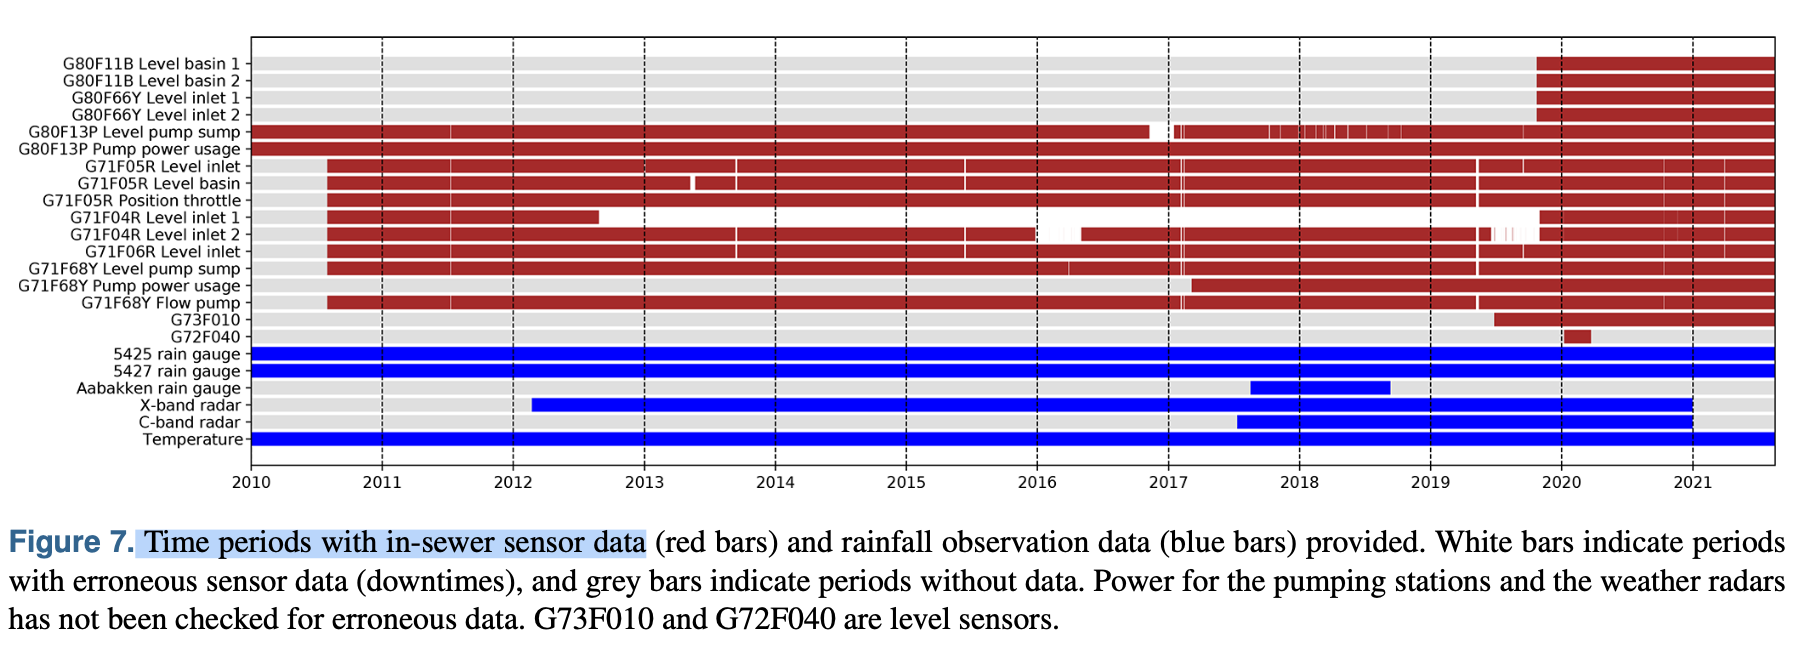

#### Missing values

Analysis of missing values
- Overview similar to the Bellinge paper
- Data types and ranges, valid?
- Identify outliers with simple metrics, e.g. Z-score or boxplots
    - visualize?
    

Interpolation

Aggregation


Combining

## Descriptive analysis

Box plots, histograms

Aggregate by time window

## Time Series Analysis

Visualize the complete time series

Trend analysis of each sensor
- seasonal decomposition

Yearly, monthly, daily
- each, averages, density based
- any trends?


Auto-correlation

## Relationship between variables

Correlation matrix

Scatter plots: linear, non-linear trends?

Cross-correlation?


## Rainfall and System Response

How does the systems respond to rainfall?

Lagged plot / cross-correlation

Extreme events analysis

## Causal Inference

Granger Causality
- can one series predict the other?


## Dimensionality reduction

PCA
- clusters?

t-SNE?

Color by
- extreme events
- 

## Event Classification

?

## Anomaly Detection

- Isolation Forests
- One-Class SVM
- Autoencoders


## Spatial analysis


Hotspot Analysis
- some areas more prone to floodings or failure?

Any network analysis? e.g. critical nodes?


## Resilience and Rubustness Assessment


Recovery time after extremen event?

Or ability to maintain functionality under stress?




## Graph modelling

Construct data for GNN modelling

Does it come with some nice visualization and analysis?